# **Airport Gate Scheduling with Highly Interconnected Flights**
This Python code solves an Airport Gate Scheduling problem using graph coloring techniques with backtracking and heuristics like Minimum Remaining Values (MRV) and Degree Heuristic. The objective is to assign gates (colors) to flights (nodes) while ensuring no two overlapping flights (connected by an edge) share the same gate. This is achieved through a graph-based model where nodes represent flights, edges represent conflicts between overlapping flights, and colors represent gates.

**Key Components**:

**Flight Data:**

Each flight is represented as a node in the graph, with arrival and departure times.
In this example, 10 flights are defined with overlapping time ranges to create a complex, interconnected graph.
Example flight:
Flight 1 arrives at minute 0 and departs at minute 50.
Flight 2 arrives at minute 20 and departs at minute 80, overlapping with Flight 1, creating a conflict (an edge).

**Graph Construction:**

A graph (G) is created using the networkx library, where each flight is a node.
Edges (conflicts) are added between any two flights whose time intervals overlap. This ensures that these flights cannot be assigned the same gate.
Heuristics: Two heuristics are used to optimize the gate assignment process:

**MRV (Minimum Remaining Values): **

Selects the flight with the fewest remaining valid gate options to color next. This reduces the chances of running into conflicts later in the algorithm.
Degree Heuristic: Selects the flight with the highest degree (the most overlapping conflicts) to assign a gate, helping resolve the most constrained conflicts early.

**Backtracking Algorithm:**

The backtracking algorithm is used to recursively assign gates to flights:

For each flight, it checks the available gates (colors).
The algorithm tries to assign a gate that does not conflict with the already assigned gates of overlapping flights.
If a valid gate is found, it continues with the next flight. If no valid gate is available, it backtracks and tries a different assignment.

**Gate Assignment Validation: **

The is_valid function checks if assigning a gate to a flight is valid:

It ensures no neighboring flight (connected by an edge) has already been assigned the same gate.

**Visualization:**

The graph is visualized using matplotlib and networkx. Each flight (node) is colored according to its assigned gate.
The visualize_graph function displays the graph with nodes representing flights and colors representing gate assignments.

Successful gate assignment: {'Flight 3': 0, 'Flight 4': 1, 'Flight 5': 2, 'Flight 6': 0, 'Flight 7': 1, 'Flight 8': 2, 'Flight 2': 2, 'Flight 9': 0, 'Flight 1': 1, 'Flight 10': 1}


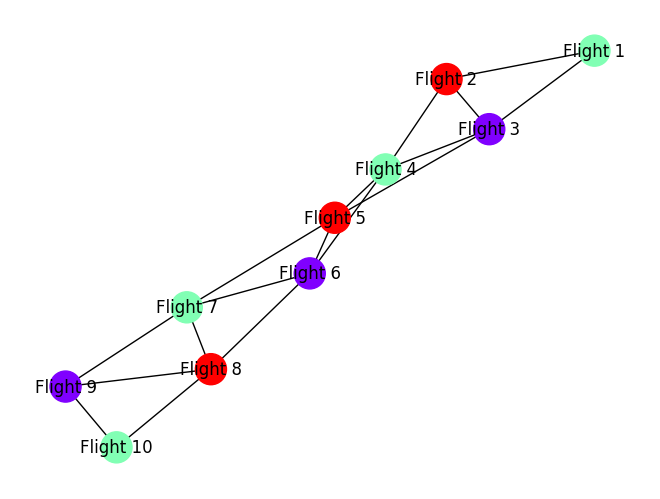

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Define flights with arrival and departure times (more interconnected flights)
flights = {
    'Flight 1': (0, 50),
    'Flight 2': (20, 80),
    'Flight 3': (40, 100),
    'Flight 4': (60, 120),
    'Flight 5': (80, 140),
    'Flight 6': (100, 160),
    'Flight 7': (120, 180),
    'Flight 8': (140, 200),
    'Flight 9': (160, 220),
    'Flight 10': (180, 240)
}

# Create edges between overlapping flights
edges = []
for f1 in flights:
    for f2 in flights:
        if f1 != f2:
            # Add edge if two flights overlap
            if not (flights[f1][1] <= flights[f2][0] or flights[f2][1] <= flights[f1][0]):
                edges.append((f1, f2))

# Define available gates (colors)
gates = [0, 1, 2, 3]  # 4 available gates

# Create the graph
G = nx.Graph()
G.add_nodes_from(flights.keys())
G.add_edges_from(edges)

# MRV Heuristic: Choose the flight with the fewest remaining gates
def select_flight_MRV(coloring, gates):
    uncolored = [flight for flight in G.nodes() if flight not in coloring]
    return min(uncolored, key=lambda flight: len([gate for gate in gates if is_valid(flight, gate, coloring)]))

# Degree Heuristic: Choose the flight with the most edges (most overlapping conflicts)
def select_flight_degree(coloring):
    uncolored = [flight for flight in G.nodes() if flight not in coloring]
    return max(uncolored, key=lambda flight: G.degree(flight))

# Check if gate assignment is valid (no conflicts)
def is_valid(flight, gate, coloring):
    for neighbor in G.neighbors(flight):
        if coloring.get(neighbor) == gate:
            return False
    return True

# Backtracking function to solve gate assignment problem
def backtrack(coloring, gates, heuristic='MRV'):
    if len(coloring) == len(G.nodes()):
        return coloring

    if heuristic == 'MRV':
        flight = select_flight_MRV(coloring, gates)
    else:
        flight = select_flight_degree(coloring)

    for gate in gates:
        if is_valid(flight, gate, coloring):
            coloring[flight] = gate
            result = backtrack(coloring, gates, heuristic)
            if result:
                return result
            del coloring[flight]  # backtrack

    return None

# Visualize the current state of the gate assignments
def visualize_graph(coloring):
    color_map = []
    for node in G:
        if node in coloring:
            color_map.append(coloring[node])
        else:
            color_map.append(-1)  # Uncolored nodes
    nx.draw(G, with_labels=True, node_color=color_map, node_size=500, cmap=plt.cm.rainbow)
    plt.show()

# Initial empty gate assignment
coloring = {}

# Run the backtracking algorithm with visualization
result = backtrack(coloring, gates, heuristic='Degree')  # Try with MRV or Degree

if result:
    print("Successful gate assignment:", result)
    visualize_graph(result)
else:
    print("No solution found.")
